# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
! pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# # set up lists to hold reponse info
search_data = []
cityList = []
countryList = []

searchCnt = 0
print("Begin API Call to OpenWeather Database ")
print("---------------------------------------")
for city in cities:
    searchCnt += 1
    print(f"Processing record {searchCnt} for the city: {city}")   
    response = requests.get(query_url + city).json()
    searchCityID = response.get("id")
    if response.get("id"):
        print(f"     Record found for city: {city}    city id: {searchCityID}")
        search_data.append(response)
        cityList.append(city)
    else:
        print(f"     No weather record found for city: {city}")

Begin API Call to OpenWeather Database 
---------------------------------------
Processing record 1 for the city: carnarvon
     Record found for city: carnarvon    city id: 1014034
Processing record 2 for the city: avarua
     Record found for city: avarua    city id: 4035715
Processing record 3 for the city: lazaro cardenas
     Record found for city: lazaro cardenas    city id: 3996234
Processing record 4 for the city: tiksi
     Record found for city: tiksi    city id: 2015306
Processing record 5 for the city: mataura
     Record found for city: mataura    city id: 6201424
Processing record 6 for the city: capitao poco
     Record found for city: capitao poco    city id: 3403127
Processing record 7 for the city: tuatapere
     Record found for city: tuatapere    city id: 2180815
Processing record 8 for the city: dhidhdhoo
     Record found for city: dhidhdhoo    city id: 1337612
Processing record 9 for the city: saldanha
     Record found for city: saldanha    city id: 2737599
Proc

     Record found for city: ushuaia    city id: 3833367
Processing record 83 for the city: alofi
     Record found for city: alofi    city id: 4036284
Processing record 84 for the city: tuktoyaktuk
     Record found for city: tuktoyaktuk    city id: 6170031
Processing record 85 for the city: mareeba
     Record found for city: mareeba    city id: 2158767
Processing record 86 for the city: meulaboh
     Record found for city: meulaboh    city id: 1214488
Processing record 87 for the city: talnakh
     Record found for city: talnakh    city id: 1490256
Processing record 88 for the city: amboasary
     Record found for city: amboasary    city id: 1081790
Processing record 89 for the city: mount gambier
     Record found for city: mount gambier    city id: 2156643
Processing record 90 for the city: cherskiy
     Record found for city: cherskiy    city id: 2126199
Processing record 91 for the city: attawapiskat
     No weather record found for city: attawapiskat
Processing record 92 for the

     Record found for city: sitka    city id: 4267710
Processing record 164 for the city: mahebourg
     Record found for city: mahebourg    city id: 934322
Processing record 165 for the city: souillac
     Record found for city: souillac    city id: 3026644
Processing record 166 for the city: tarudant
     No weather record found for city: tarudant
Processing record 167 for the city: esmeraldas
     Record found for city: esmeraldas    city id: 3464008
Processing record 168 for the city: qena
     Record found for city: qena    city id: 350550
Processing record 169 for the city: ribeira grande
     Record found for city: ribeira grande    city id: 3372707
Processing record 170 for the city: broken hill
     Record found for city: broken hill    city id: 2173911
Processing record 171 for the city: progreso
     Record found for city: progreso    city id: 3440963
Processing record 172 for the city: jamestown
     Record found for city: jamestown    city id: 2069194
Processing record 173

     Record found for city: petatlan    city id: 3992842
Processing record 245 for the city: faranah
     Record found for city: faranah    city id: 2421273
Processing record 246 for the city: tarrafal
     Record found for city: tarrafal    city id: 3374166
Processing record 247 for the city: novospasskoye
     Record found for city: novospasskoye    city id: 517897
Processing record 248 for the city: grand gaube
     Record found for city: grand gaube    city id: 934479
Processing record 249 for the city: haysyn
     Record found for city: haysyn    city id: 708901
Processing record 250 for the city: natal
     Record found for city: natal    city id: 3394023
Processing record 251 for the city: kyabe
     Record found for city: kyabe    city id: 2429344
Processing record 252 for the city: odweyne
     No weather record found for city: odweyne
Processing record 253 for the city: san bartolome de tirajana
     No weather record found for city: san bartolome de tirajana
Processing recor

     Record found for city: henderson    city id: 5505411
Processing record 325 for the city: maridi
     No weather record found for city: maridi
Processing record 326 for the city: leshukonskoye
     Record found for city: leshukonskoye    city id: 535839
Processing record 327 for the city: miastko
     Record found for city: miastko    city id: 3092080
Processing record 328 for the city: coihaique
     Record found for city: coihaique    city id: 3894426
Processing record 329 for the city: blyth
     Record found for city: blyth    city id: 2655315
Processing record 330 for the city: mahenge
     Record found for city: mahenge    city id: 155274
Processing record 331 for the city: vila franca do campo
     Record found for city: vila franca do campo    city id: 3372472
Processing record 332 for the city: termoli
     Record found for city: termoli    city id: 6541934
Processing record 333 for the city: alihe
     Record found for city: alihe    city id: 2038665
Processing record 334

     Record found for city: husavik    city id: 5961417
Processing record 406 for the city: konevo
     Record found for city: konevo    city id: 726885
Processing record 407 for the city: touros
     Record found for city: touros    city id: 3386213
Processing record 408 for the city: jackson
     Record found for city: jackson    city id: 4431410
Processing record 409 for the city: bairnsdale
     Record found for city: bairnsdale    city id: 2177233
Processing record 410 for the city: sorland
     Record found for city: sorland    city id: 3137469
Processing record 411 for the city: ossora
     Record found for city: ossora    city id: 2122389
Processing record 412 for the city: yulara
     Record found for city: yulara    city id: 6355222
Processing record 413 for the city: north bend
     Record found for city: north bend    city id: 5742974
Processing record 414 for the city: la asuncion
     Record found for city: la asuncion    city id: 3856548
Processing record 415 for the cit

     Record found for city: kabinda    city id: 215527
Processing record 488 for the city: puerto madryn
     Record found for city: puerto madryn    city id: 3840092
Processing record 489 for the city: artemisa
     Record found for city: artemisa    city id: 3568312
Processing record 490 for the city: urumqi
     No weather record found for city: urumqi
Processing record 491 for the city: davenport
     Record found for city: davenport    city id: 4853423
Processing record 492 for the city: kungurtug
     Record found for city: kungurtug    city id: 1501377
Processing record 493 for the city: karistos
     No weather record found for city: karistos
Processing record 494 for the city: porto novo
     Record found for city: porto novo    city id: 6322184
Processing record 495 for the city: bad schwalbach
     Record found for city: bad schwalbach    city id: 2953348
Processing record 496 for the city: kendari
     Record found for city: kendari    city id: 1640344
Processing record 497

     Record found for city: tres arroyos    city id: 3833859
Processing record 570 for the city: kununurra
     Record found for city: kununurra    city id: 2068110
Processing record 571 for the city: andros town
     Record found for city: andros town    city id: 3572906
Processing record 572 for the city: nguiu
     No weather record found for city: nguiu
Processing record 573 for the city: wewak
     Record found for city: wewak    city id: 2083537
Processing record 574 for the city: oktyabrskiy
     Record found for city: oktyabrskiy    city id: 515873
Processing record 575 for the city: ubatuba
     Record found for city: ubatuba    city id: 3445847
Processing record 576 for the city: careiro da varzea
     Record found for city: careiro da varzea    city id: 3402920
Processing record 577 for the city: caibarien
     Record found for city: caibarien    city id: 3566356
Processing record 578 for the city: ust-ilimsk
     Record found for city: ust-ilimsk    city id: 2013952
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
lat_data = [data.get("coord").get("lat") for data in search_data]
lng_data = [data.get("coord").get("lon") for data in search_data]
temp_data = [data.get("main").get("temp") for data in search_data]
humid_data = [data.get("main").get("humidity") for data in search_data]
cloud_data =[data.get("clouds").get("all") for data in search_data]
wind_data = [data.get("wind").get("speed") for data in search_data]

In [5]:
weather_data = pd.DataFrame({"cityName":cityList,
                            "lat":lat_data,
                            "lng":lng_data,
                            "temp":temp_data,
                            "humidity":humid_data,
                            "cloudiness":cloud_data,
                            "winds":wind_data})
weather_data.head()

,cityName,lat,lng,temp,humidity,cloudiness,winds
0,carnarvon,-30.97,22.13,13.37,8,0,4.20
1,avarua,-21.21,-159.78,25.00,83,99,6.70
2,lazaro cardenas,28.39,-105.62,28.34,57,40,4.10
3,tiksi,71.64,128.87,1.45,89,100,4.24
4,mataura,-46.19,168.86,6.67,83,100,6.71


In [6]:
weather_data.to_csv("weatherdata.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

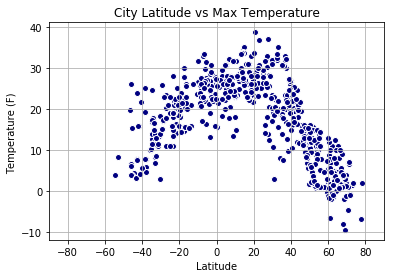

In [7]:
# Latitude vs Max Temp
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o", color="navy", edgecolor="white")

# Add chart labels
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (F) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_MaxTemp.png")
# Show plot
plt.show()

#### Latitude vs. Humidity Plot

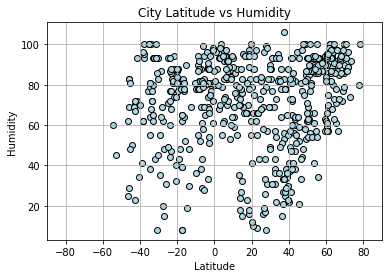

In [8]:
# Latitude vs Max Temp
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o", color='lightblue', edgecolor='black')

# Add chart labels
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Humidity.png")
# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

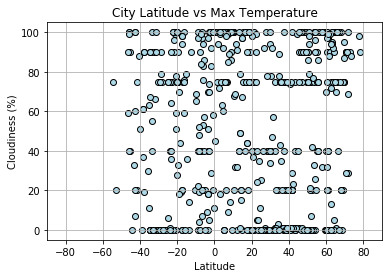

In [9]:
# Latitude vs Max Temp
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o", color='lightblue', edgecolor='black')

# Add chart labels
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Cloudiness.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

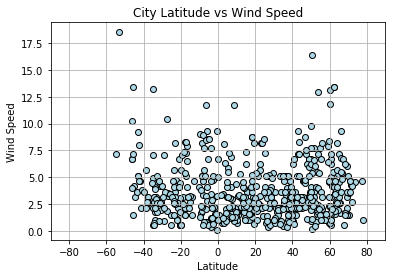

In [10]:
# Latitude vs Max Temp
plt.scatter(weather_data["lat"], weather_data["winds"], marker="o", color='lightblue', edgecolor='black')

# Add chart labels
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Wind Speed.png")
# Show plot
plt.show()